# Plugin Example: Display the average high price of a stock over a few days
In this example we do three tasks. One of these tasks will be automated in Phase 1.
1. (will be automated) We update the data on the server by hitting an API
2. Pull the data from the server
3. We display a plot

This is the minimum required code, given a finished data pipeline, to create a plugin. A plugin developer should mostly be busy fussing about the look and feel of the elements, front-end languages, and should not need any special knowledge about the data, the server, the back end. This is demonstrated in this notebook. A Plugin Developer is given an API key, and a couple example queries. Using this minimal information they are able to construct a rich experience directly off the data lake, including searching.

In addition, the code in this plugin is completely portable. There is not menton of google, or even any proprietary technology layers. If the data in the lake comes from SQL, mongodb, S3, aws, or google, the plugin developer doesn't care. This means the plugin developer has less of a learning curve.

What the plugin developer does need (from the pipeline developer) is documentation about all the 'query_id's in use, including example arguments.

# 1: Update the data on the server

In [38]:
from DataPipeline import APIRequest
for i in [13,14,15,16,17]:
    result = APIRequest.APIRequest.submit({
                              'pipeline_id':'MwBasePipeline',    
                            'query_id':'task_update_testdata',
                          'api_key':'API_USER_123',
                           'query':{'day':i}})
print(result)
#

Saved crypto_compare_2020_8_13: {'day': 13, 'action': 'manual', 'year': 2020, 'month': 8, 'datetime': datetime.datetime(2020, 8, 13, 0, 0), 'invocation_datetime': datetime.datetime(2020, 8, 26, 21, 43, 39, 351553), 'type': 'test_finance_request'}
Saved crypto_compare_2020_8_14: {'day': 14, 'action': 'manual', 'year': 2020, 'month': 8, 'datetime': datetime.datetime(2020, 8, 14, 0, 0), 'invocation_datetime': datetime.datetime(2020, 8, 26, 21, 43, 40, 807780), 'type': 'test_finance_request'}
Saved crypto_compare_2020_8_15: {'day': 15, 'action': 'manual', 'year': 2020, 'month': 8, 'datetime': datetime.datetime(2020, 8, 15, 0, 0), 'invocation_datetime': datetime.datetime(2020, 8, 26, 21, 43, 42, 71015), 'type': 'test_finance_request'}
Saved crypto_compare_2020_8_16: {'day': 16, 'action': 'manual', 'year': 2020, 'month': 8, 'datetime': datetime.datetime(2020, 8, 16, 0, 0), 'invocation_datetime': datetime.datetime(2020, 8, 26, 21, 43, 43, 265323), 'type': 'test_finance_request'}
Saved crypto_

# 2: Pull the data from the server
### (NOTE!) In the future this will be a REST API wrapper, not an import "from pipeline import MwRequest"

In [41]:
import pandas as pd
result = APIRequest.APIRequest.submit({
                              'pipeline_id':'MwBasePipeline',        
                       'query_id':'datalake_find',
                      'api_key':'API_USER_123',
                       'query':{'meta':{'type':'test_finance_request'}},
                      })
plot_data = []
for r in result:
    df = pd.DataFrame(r['__data'])
    
    display(df.head(3))
    mn =  pd.to_numeric(df['high']).mean()
    print ('mean value high:' + str( pd.to_numeric(df['high']).mean()))
    plot_data.append({'datetime':r['datetime'],'mean':mn})

,close,conversionSymbol,conversionType,high,low,open,time,volumefrom,volumeto
0,0.03385,,direct,0.03385,0.03346,0.03347,1597276800,61258.80,2061.11
1,0.03377,,direct,0.03395,0.03375,0.03385,1597280400,42430.62,1435.16
2,0.03390,,direct,0.03392,0.03376,0.03377,1597284000,40632.81,1375.08


mean value high:0.0344576


,close,conversionSymbol,conversionType,high,low,open,time,volumefrom,volumeto
0,0.03612,,direct,0.03644,0.03603,0.03604,1597363200,90702.00,3285.54
1,0.03606,,direct,0.03616,0.03601,0.03612,1597366800,42095.53,1518.88
2,0.03599,,direct,0.03616,0.03596,0.03606,1597370400,42519.04,1533.21


mean value high:0.036736


,close,conversionSymbol,conversionType,high,low,open,time,volumefrom,volumeto
0,0.03680,,direct,0.03734,0.03645,0.03724,1597449600,105232.56,3870.12
1,0.03697,,direct,0.03701,0.03670,0.03680,1597453200,41080.05,1513.87
2,0.03698,,direct,0.03709,0.03691,0.03697,1597456800,36938.10,1367.80


mean value high:0.03680719999999999


,close,conversionSymbol,conversionType,high,low,open,time,volumefrom,volumeto
0,0.03619,,direct,0.03652,0.03619,0.03647,1597536000,24076.59,875.92
1,0.03617,,direct,0.03622,0.03597,0.03619,1597539600,46178.74,1666.72
2,0.03593,,direct,0.03618,0.03593,0.03617,1597543200,41529.39,1497.06


mean value high:0.03621679999999999


,close,conversionSymbol,conversionType,high,low,open,time,volumefrom,volumeto
0,0.03635,,direct,0.03645,0.03634,0.03641,1597622400,23186.47,843.84
1,0.03611,,direct,0.03636,0.03606,0.03635,1597626000,21118.38,763.63
2,0.03592,,direct,0.03615,0.03581,0.03611,1597629600,27870.06,1001.38


mean value high:0.0358608


,close,conversionSymbol,conversionType,high,low,open,time,volumefrom,volumeto
0,0.03587,,direct,0.03592,0.03576,0.03578,1597586400,28352.66,1016.32
1,0.03631,,direct,0.03636,0.03582,0.03587,1597590000,41749.23,1505.95
2,0.03661,,direct,0.03672,0.03630,0.03631,1597593600,42925.49,1570.65


mean value high:0.036202399999999996


# 3: Display some data

,datetime,mean
0,2020-08-13 00:00:00+00:00,0.034458
1,2020-08-14 00:00:00+00:00,0.036736
2,2020-08-15 00:00:00+00:00,0.036807
3,2020-08-16 00:00:00+00:00,0.036217
4,2020-08-17 00:00:00+00:00,0.035861
5,2020-08-18 00:00:00+00:00,0.036202


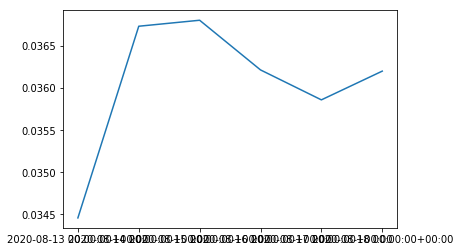

In [42]:
import matplotlib.pyplot as plt

df_plot = pd.DataFrame(plot_data)
display(df_plot)
plt.plot(list(df_plot['datetime']),list(df_plot['mean']))